In [9]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as systime
import datetime as dtime
%pylab inline
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

Populating the interactive namespace from numpy and matplotlib


In [4]:
# functions
def splitDatetime(data): #function for splitting the timestamp
    sub = pd.DataFrame(data.Dates.str.split(' ').tolist(), columns = "date time".split())
    date = pd.DataFrame(sub.date.str.split('-').tolist(), columns="year month day".split())
    time = pd.DataFrame(sub.time.str.split(':').tolist(), columns = "hour minute second".split())
    data['year'] = date['year'].astype(int)
    data['month'] = date['month'].astype(int)
    data['day'] = date['day'].astype(int)
    data['hour'] = time['hour'].astype(int)
    # translating into weekday is not needed because that information is already in the data
    #data['weekday']=0 #weekday=0: monday, weekday=6: sunday.
    #for i in range(0,len(train.year)):
    #    data.weekday[i]=dtime.date(train.year[i], train.month[i], train.day[i]).weekday()   
    return data

In [ ]:
# read in the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train = splitDatetime(train)
test = splitDatetime(test)

In [84]:
# this is a map, mapping day of week to a number:
dow = {
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
}

# this is the inverse map:
wod = {v: k for k, v in dow.items()}

# map for categories->numbers
catnum = {
'WARRANTS':0, 'OTHER OFFENSES':1, 'LARCENY/THEFT':2, 'VEHICLE THEFT':3, 'VANDALISM':4,
 'NON-CRIMINAL':5, 'ROBBERY':6, 'ASSAULT':7, 'WEAPON LAWS':8, 'BURGLARY':9,
 'SUSPICIOUS OCC':10, 'DRUNKENNESS':11, 'FORGERY/COUNTERFEITING':12, 'DRUG/NARCOTIC':13,
 'STOLEN PROPERTY':14, 'SECONDARY CODES':15, 'TRESPASS':16, 'MISSING PERSON':17, 'FRAUD':18,
 'KIDNAPPING':19, 'RUNAWAY':20, 'DRIVING UNDER THE INFLUENCE':21,
 'SEX OFFENSES FORCIBLE':22, 'PROSTITUTION':23, 'DISORDERLY CONDUCT':24, 'ARSON':25,
 'FAMILY OFFENSES':26, 'LIQUOR LAWS':27, 'BRIBERY':28, 'EMBEZZLEMENT':29, 'SUICIDE':30,
 'LOITERING':31, 'SEX OFFENSES NON FORCIBLE':32, 'EXTORTION':33, 'GAMBLING':34,
 'BAD CHECKS':35, 'TREA':36, 'RECOVERED VEHICLE':37, 'PORNOGRAPHY/OBSCENE MAT':38
}
muntac={v:k for k,v in catnum.items()}

train['DOW'] = train.DayOfWeek.map(dow)
test['DOW'] = test.DayOfWeek.map(dow)
train['catnum']=train.Category.map(catnum)

In [85]:
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,DOW,event,catnum
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,2,1,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,2,1,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,2,1,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,2,1,2
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,2,1,2


In [82]:
# list all possible categories - that's the target variable

print pd.unique(train.Category.ravel())
print len(pd.unique(train.Category.ravel()))

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']
39


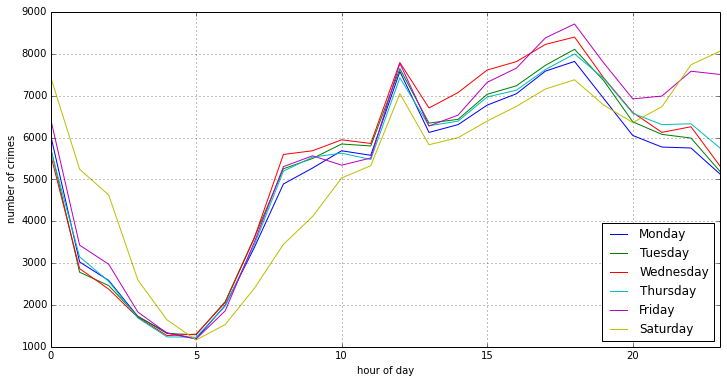

In [80]:
# plot the number of crimes vs time of day

figure(figsize=(12,6))
train['event']=1
for i in range(0,6):
    tt=train[train.DOW==i]
    hourly_events = tt[['hour','event']].groupby(['hour']).count().reset_index()
    plot(hourly_events.hour,hourly_events.event,label=wod[i])
    
grid()
legend(loc=4)
xlim(0,23);
ylabel("number of crimes")
xlabel("hour of day")

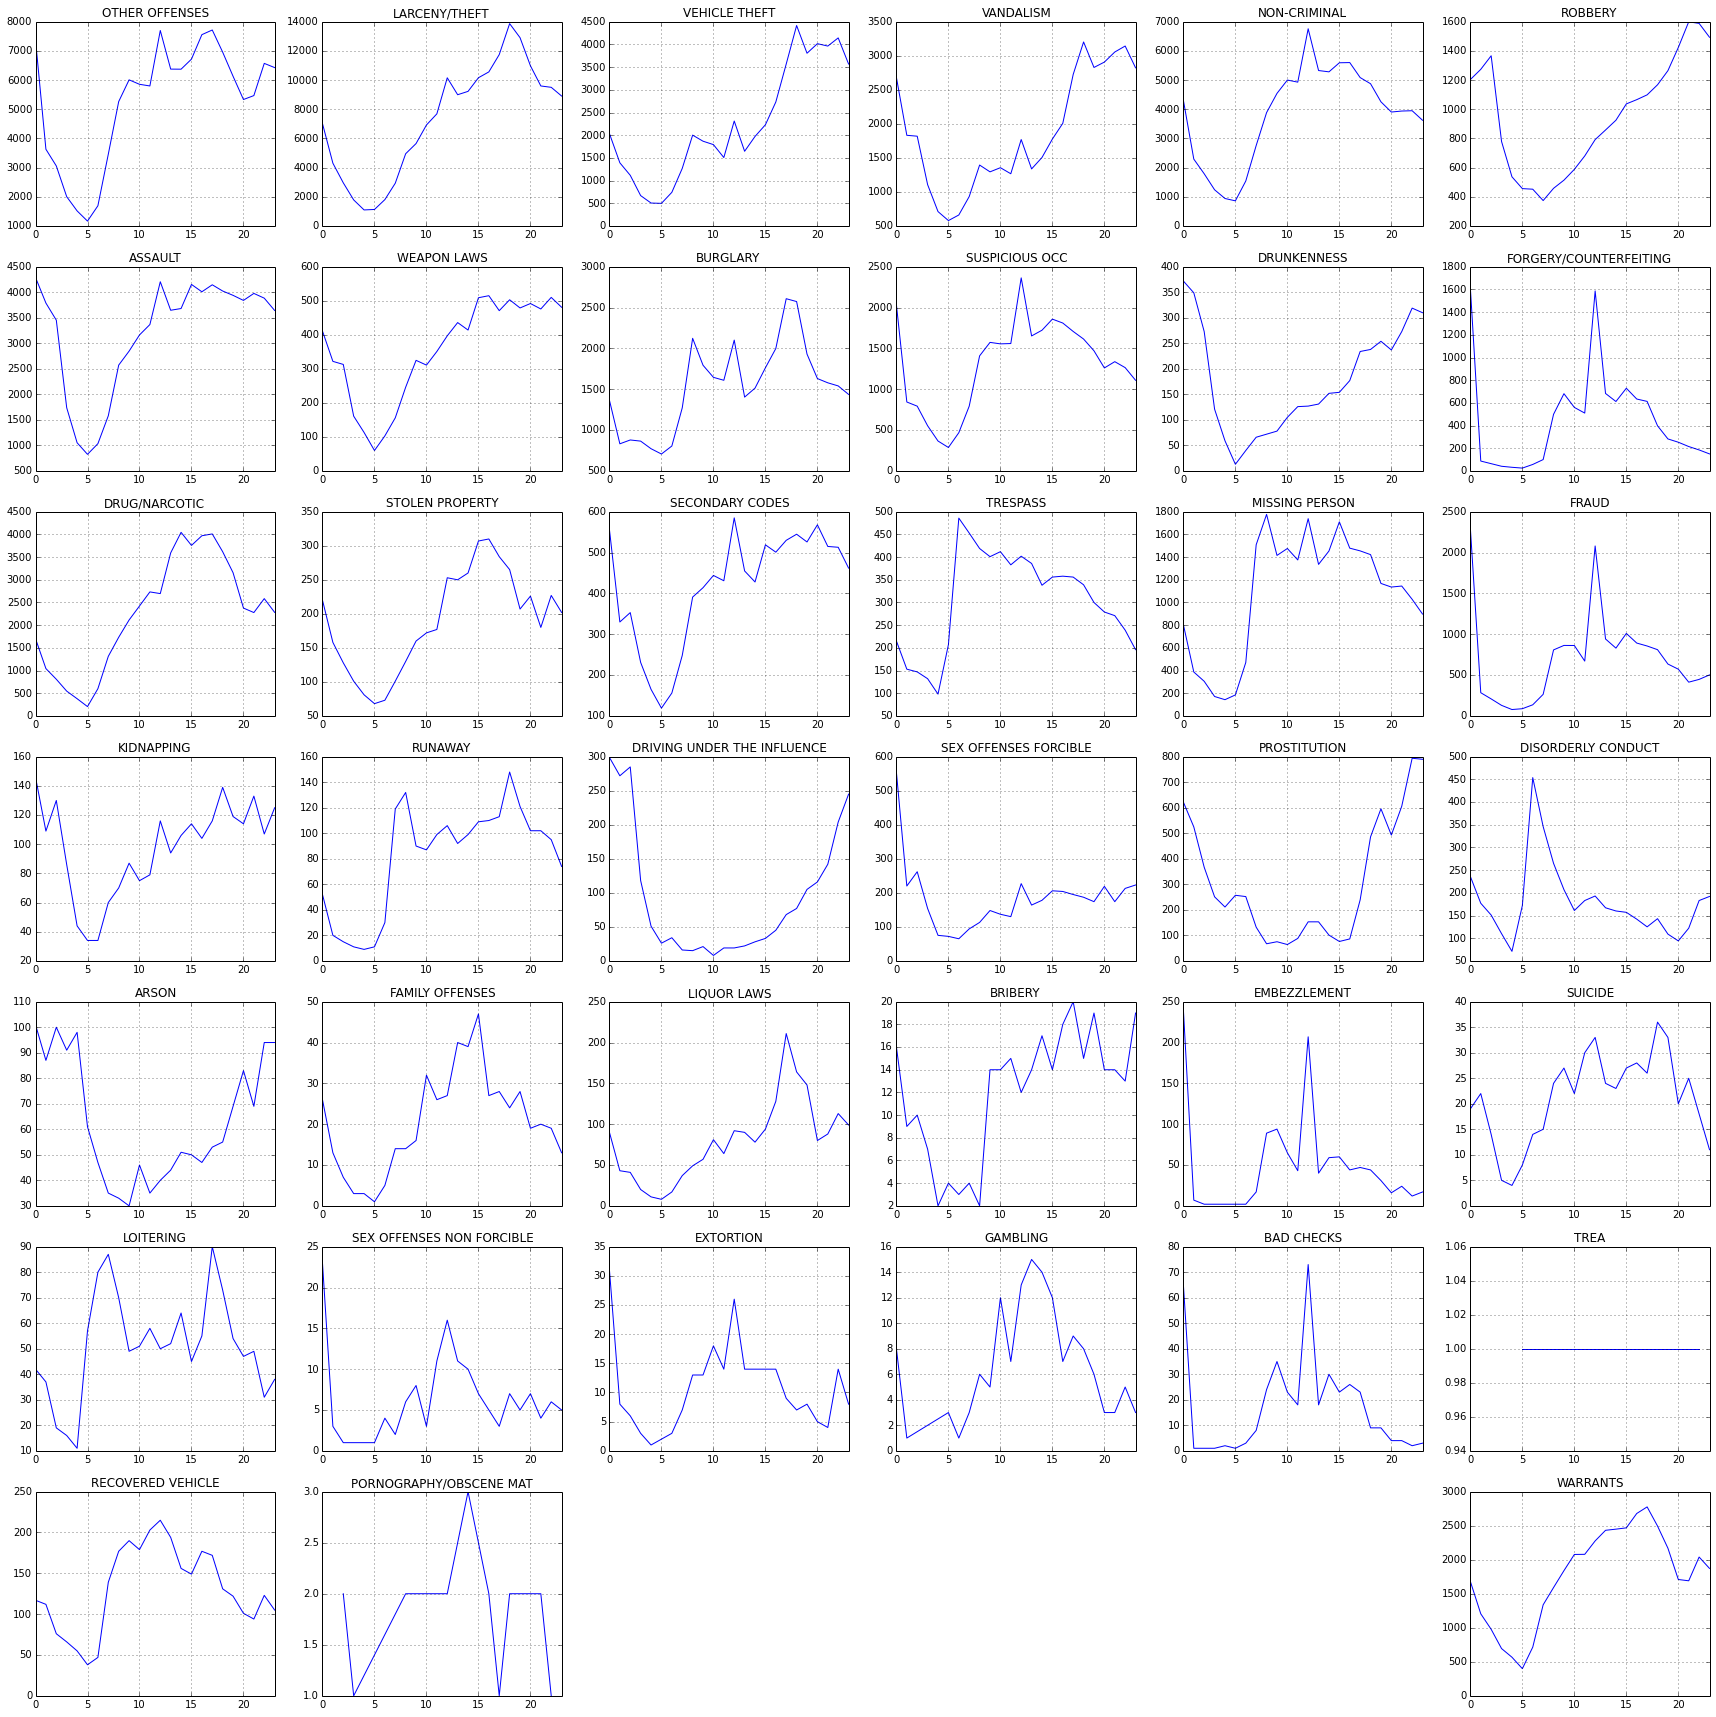

In [90]:
# plot the number of crimes vs time of day for individual crimes

figure(figsize=(30,30))
train['event']=1
for i in range(0,39):
    subplot(7,6,i)
    tt=train[train.catnum==i]
    hourly_events = tt[['hour','event']].groupby(['hour']).count().reset_index()
    plot(hourly_events.hour,hourly_events.event,label=muntac[i])
    grid()
    #legend(loc=4)
    title(muntac[i])
    xlim(0,23);
#ylabel("number of crimes")
#xlabel("hour of day")